# <h2>CIFAR 10 Dataset </h2>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical 

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


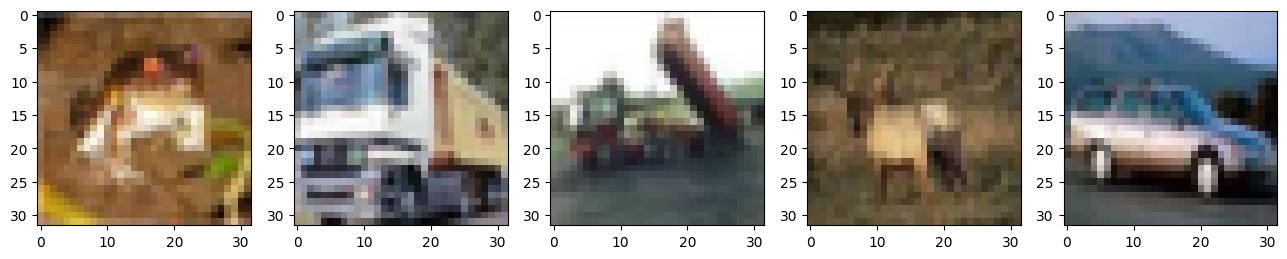

In [ ]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([y[0] for y in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[y[0]] for y in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train = X_train.reshape(50000, -1)

In [ ]:
X_train.shape

(50000, 3072)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
# Relabeling the images with [0] for 0-4 and [1] for 5-9 (as requested)
for index, imgTar in enumerate(y_train):
  if imgTar in [0, 1, 2, 3, 4]:
    y_train[index][0] = 0
  else:
    y_train[index][0] = 1

In [ ]:
y_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=uint8)

In [ ]:
# Checking the unique values of targets
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 25000]
 [    1 25000]]


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Logistic Regression model initialization
# using different solver for optimization and lower runtime
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
# Training the model
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_test = X_test.reshape(10000, -1)

In [ ]:
# Calculating the accuracy
score = logisticRegr.score(X_test, y_test)
print(f"Accuracy: {score * 100}")

Accuracy: 10.65


In [ ]:
def imbalanceTraining(train_x, train_y, numClass_1, numClass_2):
  # This function unbalances the given dataset by the proportion 
  # of numClass_1 / numClass_2 and returns X, y of the imbalanced 
  # dataset.
  # Assumtions: the dataset has just two classes, labeled as 1 & 0.
  # It should be mentioned that we operate in the way that the given 
  # dataset has same number of data that has 1 and 0 classes and devidable 
  # by numClass_2(we ignore the rest of the bigger amount classes data). 

  class1_x = []
  class1_y = []

  class2_x = []
  class2_y = []
  
  for index, tar in enumerate(train_y):
    if tar == 0:
      class1_x.append(train_x[index])
      class1_y.append(train_y[index])
    elif tar == 1:
      class2_x.append(train_x[index])
      class2_y.append(train_y[index])

  # Making the class 1 and 2 same size 
  # and devidable by numClass_2 (as requested in documention)
  totalNum_class_1 = len(class1_x)
  totalNum_class_2 = len(class2_x)

  min_classes = min(totalNum_class_1, totalNum_class_2)

  samer_treshold = min_classes - (min_classes % numClass_2)
  class1_x = class1_x[:samer_treshold]
  class1_y = class1_y[:samer_treshold]

  class2_x = class2_x[:samer_treshold]
  class2_y = class2_y[:samer_treshold]

  new_dataset_x = np.zeros(shape=(int(samer_treshold/numClass_2) * 100, len(class2_x[0])))
  new_dataset_y = np.zeros(shape=(int(samer_treshold/numClass_2) * 100, len(class2_y[0])))

  class1_x = np.array(class1_x)
  class1_y = np.array(class1_y)
  class2_x = np.array(class2_x)
  class2_y = np.array(class2_y)

  # Making the new imbalance dataset with proportion of numClass2 / numClass1
  class1_counter = 0
  class2_counter = 0
  for i in range(int(samer_treshold/numClass_2) * 100):
    
    if i % numClass_2 != 0:
      new_dataset_x[i] = class2_x[class2_counter]
      new_dataset_y[i] = class2_y[class2_counter]
      class2_counter += 1

    if i % numClass_2 == 0:
      new_dataset_x[i + 1] = class1_x[class1_counter]
      new_dataset_y[i + 1] = class1_y[class1_counter]

      class1_counter += 1
      i += 1

  return new_dataset_x, new_dataset_y

In [ ]:
X_train.shape

(50000, 3072)

In [ ]:
# a)
numClass_1 = 1
numClass_2 = 99
X, y = imbalanceTraining(X_train, y_train, numClass_1, numClass_2)

In [ ]:
# b)
numClass_1 = 5
numClass_2 = 95
X, y = imbalanceTraining(X_train, y_train, numClass_1, numClass_2)

In [ ]:
# c)
numClass_1 = 10
numClass_2 = 90
X, y = imbalanceTraining(X_train, y_train, numClass_1, numClass_2)

In [ ]:
# d)
numClass_1 = 20
numClass_2 = 80
X, y = imbalanceTraining(X_train, y_train, numClass_1, numClass_2)

In [ ]:
# e)
numClass_1 = 30
numClass_2 = 70
X, y = imbalanceTraining(X_train, y_train, numClass_1, numClass_2)

##Idea No.1: Class weighting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Logistic Regression model initialization
# using different solver for optimization and lower runtime
# and passing class_weight which manually weight of classes have been set
logisticRegr = LogisticRegression(solver = 'lbfgs', class_weight={0:0.99,1:0.01})

In [ ]:
# Training the model
logisticRegr.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight={0: 0.99, 1: 0.01})

In [ ]:
# Calculating the accuracy
score = logisticRegr.score(X_test, y_test)
print(f"Accuracy: {score * 100}")

Accuracy: 10.0


##Idea No.2: Replicating the minority class objects

In [ ]:
def replication(train_x, train_y, numClass_1, numClass_2):
  class1_x = []
  class1_y = []

  class2_x = []
  class2_y = []
  
  for index, tar in enumerate(train_y):
    if tar == 0:
      for i in range(int(math.floor(numClass_2 / 10))):
        class1_x.append(train_x[index])
        class1_y.append(train_y[index])
    elif tar == 1:
      class2_x.append(train_x[index])
      class2_y.append(train_y[index])

  new_dataset_x = class1_x + class2_x
  new_dataset_y = class1_y + class2_y

  return new_dataset_x, new_dataset_y

In [ ]:
# a)
numClass_1 = 1
numClass_2 = 99
X_r, y_r = replication(X, y, numClass_1, numClass_2)

In [ ]:
len(X_r)

27240

In [ ]:
# b)
numClass_1 = 5
numClass_2 = 95
X_r, y_r = replication(X, y, numClass_1, numClass_2)

In [ ]:
# c)
numClass_1 = 10
numClass_2 = 90
X_r, y_r = replication(X, y, numClass_1, numClass_2)

In [ ]:
# d)
numClass_1 = 20
numClass_2 = 80
X_r, y_r = replication(X, y, numClass_1, numClass_2)

In [ ]:
# e)
numClass_1 = 30
numClass_2 = 70
X_r, y_r = replication(X, y, numClass_1, numClass_2)

In [ ]:
# Initialaztion of the model
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
# Training the model 
logisticRegr.fit(X_r, y_r)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Calculating the accuracy
score = logisticRegr.score(X_test, y_test)
print(f"Accuracy: {score * 100}")

Accuracy: 10.0


##Idea No.3: Ensemble Different Resampled Datasets
Idea is that we create and fit different models with different proportion of classes and also with weights according to their proportion; then calculating their vote about label of a test data. In the end, we calculate the ensemble model's final vote.

In [ ]:
def modelCreator(X, y, test_x, text_y, numClass_1, numClass_2):
  # Initialaztion of the model
  class_1_w = numClass_1 / (numClass_1 + numClass_2)
  class_2_w = numClass_2 / (numClass_1 + numClass_2)

  logisticRegr = LogisticRegression(solver = 'lbfgs', class_weight={0:class_1_w, 1:class_2_w})

  # Training the model 
  logisticRegr.fit(X, y)

  # Calculating the accuracy
  score = logisticRegr.score(test_x, text_y)
  
  return logisticRegr, score

In [ ]:
# Creating different models with different proportions of class1 and class2
proportions = [[1, 99], [5, 95], [10, 90], [20, 80], [30, 70]]
acc_collection = []
predictions_collection = []

for p in proportions: 
  numClass_1 = p[0]
  numClass_2 = p[1]
  X_r, y_r = replication(X, y, numClass_1, numClass_2)

  model, accuracy = modelCreator(X_r, y_r, X_test, y_test, numClass_1, numClass_2)
  
  acc_collection.append(accuracy)
  pred = model.predict(X_test)
  predictions_collection.append(pred)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [ ]:
predictions_collection[0]

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
# Counting votes of models for each test data
counting_preds = [[0, 0] for i in range(len(X_test))]
for pres in predictions_collection:
  for index, p in enumerate(pres):
    if p == 0:
      counting_preds[index][0] += 1
    elif p == 1:
      counting_preds[index][1] += 1

ensemble_pred = []
for pre in counting_preds:
  if pre[0] >= pre[1]:
    ensemble_pred.append(0)
  else:
    ensemble_pred.append(1)

In [ ]:
success_counter = 0
for index, pred in enumerate(ensemble_pred):
  if pred == y_test[index]:
    success_counter += 1

score = success_counter / len(ensemble_pred)
print(f"Score: {score}, Average accuracy of models: {sum(acc_collection)/len(acc_collection)}")

Score: 0.1, Average accuracy of models: 0.1


# <h2> MNIST Dataset </h2>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Downloading the MNIST Dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml(
    "mnist_784", version=1, as_frame=False, parser="pandas"
)

In [ ]:
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)

# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


In [ ]:
# Relabeling the images with [0] for 0-4 and [1] for 5-9 (as requested)
for index, imgTar in enumerate(mnist.target):
  if imgTar in ['0', '1', '2', '3', '4']:
    mnist.target[index] = '0'
  else:
    mnist.target[index] = '1'

In [ ]:
# Checking the unique values of targets
unique, counts = np.unique(mnist.target, return_counts=True)
print(np.asarray((unique, counts)).T)

[['0' 35735]
 ['1' 34265]]


In [ ]:
# Splitting train and test data
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

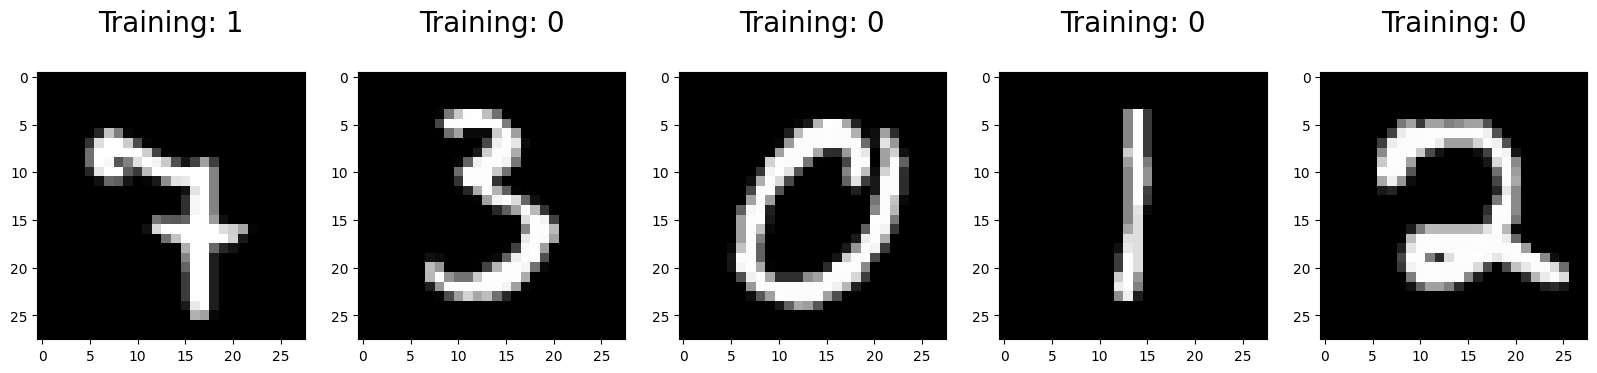

In [ ]:
# Plotting some the photos with their labels
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
  plt.title(f'Training: {label}\n', fontsize = 20)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Logistic Regression model initialization
# using different solver for optimization and lower runtime
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
# Training the model
logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

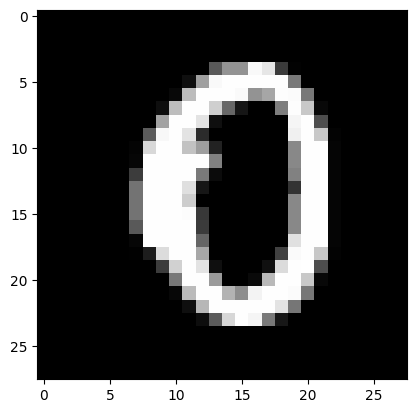

In [ ]:
# Plotting the first test image
plt.imshow(np.reshape(test_img[0].reshape(1,-1), (28,28)), cmap=plt.cm.gray)

In [ ]:
# Predict for One (first) image
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['1'], dtype=object)

In [ ]:
# Predicting all the test images
predictions = logisticRegr.predict(test_img)

In [ ]:
len(predictions)

10000

In [ ]:
# Calculating the accuracy
score = logisticRegr.score(test_img, test_lbl)
print(f"Accuracy: {score * 100}")

Accuracy: 86.82


In [ ]:
# Showing some misclassified photos

index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
  if label != predict: 
    misclassifiedIndexes.append(index)
  index +=1

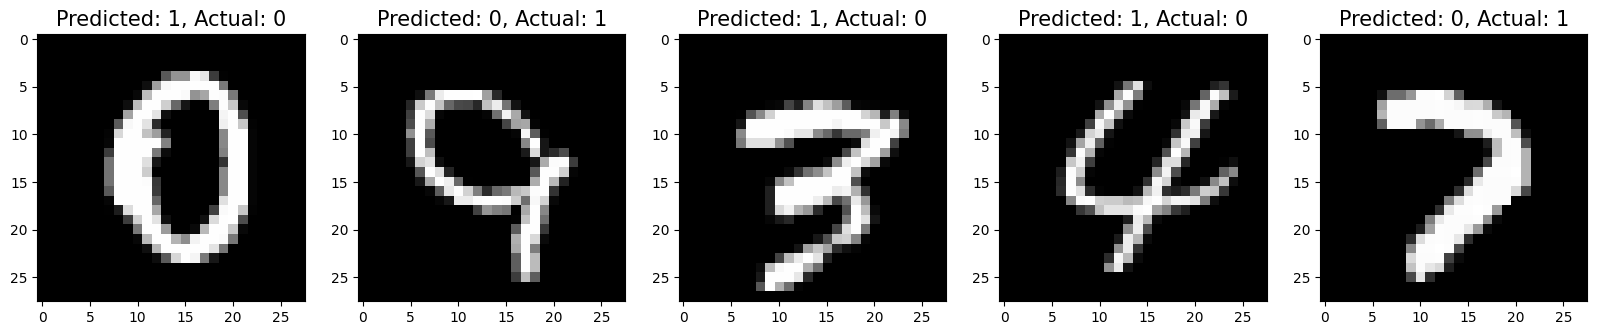

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title(f"Predicted: {predictions[badIndex]}, Actual: {test_lbl[badIndex]}", fontsize = 15)

<h2> Imbalancing Dataset </h2>

In [ ]:
len(train_img)

60000

In [ ]:
# Checking the unique values of targets
unique, counts = np.unique(mnist.target, return_counts=True)
print(np.asarray((unique, counts)).T)

[['0' 35735]
 ['1' 34265]]


In [ ]:
def imbalanceTraining(train_x, train_y, numClass_1, numClass_2):
  # This function unbalances the given dataset by the proportion 
  # of numClass_1 / numClass_2 and returns X, y of the imbalanced 
  # dataset.
  # Assumtions: the dataset has just two classes, labeled as 1 & 0.
  # It should be mentioned that we operate in the way that the given 
  # dataset has same number of data that has 1 and 0 classes and devidable 
  # by numClass_2(we ignore the rest of the bigger amount classes data). 

  class1_x = []
  class1_y = []

  class2_x = []
  class2_y = []
  
  for index, tar in enumerate(train_y):
    if tar == '0':
      class1_x.append(train_x[index])
      class1_y.append(train_y[index])
    elif tar == '1':
      class2_x.append(train_x[index])
      class2_y.append(train_y[index])

  # Making the class 1 and 2 same size 
  # and devidable by numClass_2 (as requested in documention)
  totalNum_class_1 = len(class1_x)
  totalNum_class_2 = len(class2_x)

  min_classes = min(totalNum_class_1, totalNum_class_2)

  samer_treshold = min_classes - (min_classes % numClass_2)
  class1_x = class1_x[:samer_treshold]
  class1_y = class1_y[:samer_treshold]

  class2_x = class2_x[:samer_treshold]
  class2_y = class2_y[:samer_treshold]

  new_dataset_x = np.zeros(shape=(int(samer_treshold/numClass_2) * 100, len(class2_x[0])))
  new_dataset_y = np.zeros(shape=(int(samer_treshold/numClass_2) * 100, len(class2_y[0])))

  class1_x = np.array(class1_x)
  class1_y = np.array(class1_y)
  class2_x = np.array(class2_x)
  class2_y = np.array(class2_y)

  # Making the new imbalance dataset with proportion of numClass2 / numClass1
  class1_counter = 0
  class2_counter = 0
  for i in range(int(samer_treshold/numClass_2) * 100):
    
    if i % numClass_2 != 0:
      new_dataset_x[i] = class2_x[class2_counter]
      new_dataset_y[i] = class2_y[class2_counter]
      class2_counter += 1

    if i % numClass_2 == 0:
      new_dataset_x[i + 1] = class1_x[class1_counter]
      new_dataset_y[i + 1] = class1_y[class1_counter]

      class1_counter += 1
      i += 1

  return new_dataset_x, new_dataset_y

In [ ]:
# a)
numClass_1 = 1
numClass_2 = 99
X, y = imbalanceTraining(train_img, train_lbl, numClass_1, numClass_2)

In [ ]:
len(X)

29700

In [ ]:
len(y)

29700

In [ ]:
# b)
numClass_1 = 5
numClass_2 = 95
X, y = imbalanceTraining(test_img, test_lbl, numClass_1, numClass_2)

In [ ]:
# c)
numClass_1 = 10
numClass_2 = 90
X, y = imbalanceTraining(train_img, train_lbl, numClass_1, numClass_2)

In [ ]:
# d)
numClass_1 = 20
numClass_2 = 80
X, y = imbalanceTraining(train_img, train_lbl, numClass_1, numClass_2)

In [ ]:
# e)
numClass_1 = 30
numClass_2 = 70
X, y = imbalanceTraining(train_img, train_lbl, numClass_1, numClass_2)

##Idea No.1: Class weighting

In [ ]:
# Logistic Regression model initialization
# using different solver for optimization and lower runtime
# and passing class_weight which manually weight of classes have been set
logisticRegr = LogisticRegression(solver = 'lbfgs', class_weight={'0':0.99,'1':0.01})

In [ ]:
# prepration of lables 
y_temp = [0 for i in range(len(y))]

In [ ]:
for index, lbl in enumerate(y):
  y_temp[index] = str(int(lbl[0]))

In [ ]:
y = y_temp

In [ ]:
# Training the model
logisticRegr.fit(X, y)

LogisticRegression(class_weight={'0': 0.99, '1': 0.01})

In [ ]:
# Calculating the accuracy
score = logisticRegr.score(test_img, test_lbl)
print(f"Accuracy: {score * 100:.2f}")

Accuracy: 48.48


Or

In [ ]:
# Logistic Regression model initialization
# using different solver for optimization and lower runtime
# and passing class_weight which manually weight of classes have been set
logisticRegr = LogisticRegression(solver = 'lbfgs', class_weight="balanced")

In [ ]:
# Training the model
logisticRegr.fit(X, y)

LogisticRegression(class_weight='balanced')

In [ ]:
# Calculating the accuracy
score = logisticRegr.score(test_img, test_lbl)
print(f"Accuracy: {score * 100:.2f}")

Accuracy: 48.48


##Idea No.2: Replicating the minority class objects

In [ ]:
def replication(train_x, train_y, numClass_1, numClass_2):
  class1_x = []
  class1_y = []

  class2_x = []
  class2_y = []
  
  for index, tar in enumerate(train_y):
    if tar == '0':
      for i in range(numClass_2):
        class1_x.append(train_x[index])
        class1_y.append(train_y[index])
    elif tar == '1':
      class2_x.append(train_x[index])
      class2_y.append(train_y[index])

  new_dataset_x = class1_x + class2_x
  new_dataset_y = class1_y + class2_y

  return new_dataset_x, new_dataset_y

In [ ]:
# a)
numClass_1 = 1
numClass_2 = 99
X_r, y_r = replication(X, y, numClass_1, numClass_2)

In [ ]:
len(X_r)

59100

In [ ]:
# b)
numClass_1 = 5
numClass_2 = 95
X_r, y_r = replication(X, y, numClass_1, numClass_2)

In [ ]:
# c)
numClass_1 = 10
numClass_2 = 90
X_r, y_r = replication(X, y, numClass_1, numClass_2)

In [ ]:
# d)
numClass_1 = 20
numClass_2 = 80
X_r, y_r = replication(X, y, numClass_1, numClass_2)

In [ ]:
# e)
numClass_1 = 30
numClass_2 = 70
X_r, y_r = replication(X, y, numClass_1, numClass_2)

In [ ]:
# Initialaztion of the model
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
# Training the model 
logisticRegr.fit(X_r, y_r)

LogisticRegression()

In [ ]:
# Calculating the accuracy
score = logisticRegr.score(test_img, test_lbl)
print(f"Accuracy: {score * 100:.2f}")

Accuracy: 48.48


##Idea No.3: Ensemble Different Resampled Datasets
Idea is that we create and fit different models with different proportion of classes and also with weights according to their proportion; then calculating their vote about label of a test data. In the end, we calculate the ensemble model's final vote.

In [ ]:
def modelCreator(X, y, test_x, text_y, numClass_1, numClass_2):
  # Initialaztion of the model
  class_1_w = numClass_1 / (numClass_1 + numClass_2)
  class_2_w = numClass_2 / (numClass_1 + numClass_2)

  logisticRegr = LogisticRegression(solver = 'lbfgs', class_weight={'0':class_1_w,'1':class_2_w})

  # Training the model 
  logisticRegr.fit(X, y)

  # Calculating the accuracy
  score = logisticRegr.score(test_x, text_y)
  
  return logisticRegr, score

In [ ]:
# Creating different models with different proportions of class1 and class2
proportions = [[1, 99], [5, 95], [10, 90], [20, 80], [30, 70]]
acc_collection = []
predictions_collection = []

for p in proportions: 
  numClass_1 = p[0]
  numClass_2 = p[1]
  X_r, y_r = replication(X, y, numClass_1, numClass_2)

  model, accuracy = modelCreator(X_r, y_r, test_img, test_lbl, numClass_1, numClass_2)
  
  acc_collection.append(accuracy)
  pred = model.predict(test_img)
  predictions_collection.append(pred)

In [ ]:
predictions_collection[0]

array(['1', '1', '1', ..., '1', '1', '1'], dtype='<U1')

In [ ]:
# Counting votes of models for each test data
counting_preds = [[0, 0] for i in range(len(test_img))]
for pres in predictions_collection:
  for index, p in enumerate(pres):
    if p == '0':
      counting_preds[index][0] += 1
    elif p == '1':
      counting_preds[index][1] += 1

ensemble_pred = []
for pre in counting_preds:
  if pre[0] >= pre[1]:
    ensemble_pred.append('0')
  else:
    ensemble_pred.append('1')

In [ ]:
success_counter = 0
for index, pred in enumerate(ensemble_pred):
  if pred == test_lbl[index]:
    success_counter += 1

score = success_counter / len(ensemble_pred)
print(f"Score: {score}, Average accuracy of models: {sum(acc_collection)/len(acc_collection)}")

Score: 0.4848, Average accuracy of models: 0.4848


##MultiClass

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
# Downloading the MNIST Dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml(
    "mnist_784", version=1, as_frame=False, parser="pandas"
)

In [ ]:
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)

# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


In [ ]:
# Checking the unique values of targets
unique, counts = np.unique(mnist.target, return_counts=True)
print(np.asarray((unique, counts)).T)

[['0' 6903]
 ['1' 7877]
 ['2' 6990]
 ['3' 7141]
 ['4' 6824]
 ['5' 6313]
 ['6' 6876]
 ['7' 7293]
 ['8' 6825]
 ['9' 6958]]


In [106]:
# Splitting train and test data
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Logistic Regression model initialization
# using different solver for optimization and lower runtime
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
# Training the model
logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Calculating the accuracy
score = logisticRegr.score(test_img, test_lbl)
print(f"Accuracy: {score * 100}")

Accuracy: 91.84


In [ ]:
# Checking the unique values of targets
unique, counts = np.unique(mnist.target, return_counts=True)
print(np.asarray((unique, counts)).T)

[['0' 6903]
 ['1' 7877]
 ['2' 6990]
 ['3' 7141]
 ['4' 6824]
 ['5' 6313]
 ['6' 6876]
 ['7' 7293]
 ['8' 6825]
 ['9' 6958]]


In [ ]:
train_lbl.shape

(60000,)

In [107]:
def imbalanceTraining(train_x, train_y, arr_distribution):
  # This function imbalances the given dataset by the proportion 
  # of arr_distribution (percent) and returns X, y of the imbalanced 
  # dataset.
  # Assumtions: the dataset is balanced for every classes 
  
  unique, counts = np.unique(mnist.target, return_counts=True)
  class_counts = np.asarray((unique, counts)).T

  # Calculating how much do we need from each class
  needed_class_counts = []
  for index, count in enumerate(class_counts):
    needed_class_counts.append(int(count[1] * arr_distribution[index] / 100))

  new_dataset_x = np.zeros(shape = ( sum(needed_class_counts), len(train_x[0]) ))
  new_dataset_y = np.zeros(shape = ( sum(needed_class_counts), len(train_y[0]) ))

  # Report for checking the teshold of each class
  report_class_count = [0 for i in range(len(unique))]
  counter_new_ds = 0
  for index, lbl in enumerate(train_y):
    if report_class_count[int(lbl)] < needed_class_counts[int(lbl)]:
      new_dataset_x[counter_new_ds] = train_x[index]
      new_dataset_y[counter_new_ds] = train_y[index]

      report_class_count[int(lbl)] += 1
      counter_new_ds += 1

  return new_dataset_x, new_dataset_y

In [108]:
# persentage of classes
distribution_arr = [30, 22, 6, 6, 6, 6, 6, 6, 6, 6]

In [ ]:
train_img.shape

(60000, 784)

In [109]:
X, y = imbalanceTraining(train_img, train_lbl, distribution_arr)

In [ ]:
len(X)

7111

###Idea No.1: Class weighting

In [ ]:
# Logistic Regression model initialization
# using different solver for optimization and lower runtime
# and passing class_weight which manually weight of classes have been set
logisticRegr = LogisticRegression(solver = 'lbfgs', 
                                  class_weight={'0':0.06,
                                                '1':0.06,
                                                '2':0.30,
                                                '3':0.30,
                                                '4':0.30,
                                                '5':0.30,
                                                '6':0.30,
                                                '7':0.30,
                                                '8':0.30,
                                                '9':0.30})

In [ ]:
# prepration of lables 
y_temp = [0 for i in range(len(y))]

In [ ]:
for index, lbl in enumerate(y):
  y_temp[index] = str(int(lbl[0]))

In [ ]:
y = y_temp

In [ ]:
np.array(y).T

array(['7', '3', '0', ..., '0', '0', '0'], dtype='<U1')

In [ ]:
# Training the model
logisticRegr.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={'0': 0.06, '1': 0.06, '2': 0.3, '3': 0.3,
                                 '4': 0.3, '5': 0.3, '6': 0.3, '7': 0.3,
                                 '8': 0.3, '9': 0.3})

In [ ]:
# Calculating the accuracy
score = logisticRegr.score(test_img, test_lbl)
print(f"Accuracy: {score * 100:.2f}")

Accuracy: 85.06


###Idea No.2: Replicating the minority class objects

In [ ]:
def replication(train_x, train_y, arr_distribution, max_class):
  
  # Calculating how many times we should replicate a data
  replicating_each_data_times = []
  for class_num in dist:
    times = int(round(max_class[1] / class_num[1], 0))
    replicating_each_data_times.append(times)

  new_len = 0
  for i in range(len(replicating_each_data_times)):
    new_len += replicating_each_data_times[i] * arr_distribution[i][1]

  new_dataset_x = np.zeros( shape=(new_len , len(train_x[0])) )
  new_dataset_y = np.zeros( shape=(new_len , len(train_y[0])) )

  counter = 0
  for i in range(len(train_y)):    
    for t in range(replicating_each_data_times[int(train_y[i])]):
      new_dataset_x[counter] = train_x[i]
      new_dataset_y[counter] = train_y[i]

      counter += 1

  return new_dataset_x, new_dataset_y

In [ ]:
unique, counts = np.unique(y, return_counts=True)
temp_dist = np.asarray((unique, counts)).T

In [ ]:
dist = []
for i in range(temp_dist.shape[0]):
   dist.append([str(i) ,int(temp_dist[i][1])])

In [ ]:
dist

[['0', 2070],
 ['1', 1732],
 ['2', 419],
 ['3', 428],
 ['4', 409],
 ['5', 378],
 ['6', 412],
 ['7', 437],
 ['8', 409],
 ['9', 417]]

In [ ]:
max = np.max(counts)
max_class = []

for class_num in dist:
  if class_num[1] == max:
    max_class = [class_num[0], class_num[1]]
    break

In [ ]:
max_class

['0', 2070]

In [ ]:
X_r, y_r = replication(X, y, dist, max_class)

In [ ]:
len(X_r)

20347

In [ ]:
unique, counts = np.unique(y_r, return_counts=True)
np.asarray((unique, counts)).T

array([[0.000e+00, 2.070e+03],
       [1.000e+00, 1.732e+03],
       [2.000e+00, 2.095e+03],
       [3.000e+00, 2.140e+03],
       [4.000e+00, 2.045e+03],
       [5.000e+00, 1.890e+03],
       [6.000e+00, 2.060e+03],
       [7.000e+00, 2.185e+03],
       [8.000e+00, 2.045e+03],
       [9.000e+00, 2.085e+03]])

In [ ]:
# Logistic Regression model initialization
# using different solver for optimization and lower runtime
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [83]:
# prepration of lables 
y_temp = [0 for i in range(len(y_r))]

In [84]:
for index, lbl in enumerate(y_r):
  y_temp[index] = str(int(lbl[0]))

In [86]:
y_r = y_temp

In [87]:
# Training the model 
logisticRegr.fit(X_r, y_r)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
# Calculating the accuracy
score = logisticRegr.score(test_img, test_lbl)
print(f"Accuracy: {score * 100:.2f}")

Accuracy: 85.05


###Idea No.3: Ensemble Different Resampled Datasets
Idea is that we create and fit different models with different proportion of classes and also with weights according to their proportion; then calculating their vote about label of a test data. In the end, we calculate the ensemble model's final vote.

In [ ]:
def imbalanceTraining(train_x, train_y, arr_distribution):
  # This function imbalances the given dataset by the proportion 
  # of arr_distribution (percent) and returns X, y of the imbalanced 
  # dataset.
  # Assumtions: the dataset is balanced for every classes 
  
  unique, counts = np.unique(mnist.target, return_counts=True)
  class_counts = np.asarray((unique, counts)).T

  # Calculating how much do we need from each class
  needed_class_counts = []
  for index, count in enumerate(class_counts):
    needed_class_counts.append(int(count[1] * arr_distribution[index] / 100))

  new_dataset_x = np.zeros(shape = ( sum(needed_class_counts), len(train_x[0]) ))
  new_dataset_y = np.zeros(shape = ( sum(needed_class_counts), len(train_y[0]) ))

  # Report for checking the teshold of each class
  report_class_count = [0 for i in range(len(unique))]
  counter_new_ds = 0
  for index, lbl in enumerate(train_y):
    if report_class_count[int(lbl)] < needed_class_counts[int(lbl)]:
      new_dataset_x[counter_new_ds] = train_x[index]
      new_dataset_y[counter_new_ds] = train_y[index]

      report_class_count[int(lbl)] += 1
      counter_new_ds += 1

  return new_dataset_x, new_dataset_y

In [116]:
def modelCreator(X, y, test_x, text_y, dist):
  # Initialaztion of the model

  logisticRegr = LogisticRegression(solver = 'lbfgs')

  # Training the model 
  logisticRegr.fit(X, y)

  # Calculating the accuracy
  score = logisticRegr.score(test_x, text_y)
  
  return logisticRegr, score

In [129]:
test_lbl

array(['0', '4', '1', ..., '1', '3', '0'], dtype=object)

In [132]:
# Creating different models with different proportions of class1 and class2

# different proportions 
proportions = [[30, 22, 6, 6, 6, 6, 6, 6, 6, 6],
               [6, 22, 6, 6, 6, 6, 30, 6, 6, 6], 
               [15, 15, 8, 8, 4, 4, 12, 12, 11, 11], 
               [11, 12, 11, 12, 16, 14, 8, 8, 4, 4], 
               [20, 20, 8, 8, 6, 6, 7, 7, 9, 9]]

acc_collection = []
predictions_collection = []

for p in proportions:
  X, y = imbalanceTraining(train_img, train_lbl, p)
  
  unique, counts = np.unique(y, return_counts=True)
  temp_dist = np.asarray((unique, counts)).T
  
  dist = []
  for i in range(temp_dist.shape[0]):
    dist.append([str(i) ,int(temp_dist[i][1])])
  max = np.max(counts)
  max_class = []

  for class_num in dist:
    if class_num[1] == max:
      max_class = [class_num[0], class_num[1]]
      break

  X_r, y_r = replication(X, y, dist, max_class)
  model, accuracy = modelCreator(X_r, y_r, test_img, test_lbl, dist)

  acc_collection.append(accuracy)
  pred = model.predict(test_img)

  pred_temp = []
  for pr in pred:
    pred_temp.append(str(int(pr)))

  pred = pred_temp
  predictions_collection.append(pred)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

In [ ]:
predictions_collection[0]

In [134]:
# Counting votes of models for each test data
counting_preds = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] for i in range(len(test_img))]
for pres in predictions_collection:
  for index, p in enumerate(pres):
    counting_preds[index][int(p)] += 1 

# ensemble_pred.append(max)
ensemble_pred = []
for pre in counting_preds:
  ensemble_pred.append(str(np.max(pre)))

In [135]:
success_counter = 0
for index, pred in enumerate(ensemble_pred):
  if pred == test_lbl[index]:
    success_counter += 1

score = success_counter / len(ensemble_pred)
print(f"Score: {score}")

Score: 0.0817


# <h2>IRIS Dataset</h2>

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# Store features matrix in X
X = iris.data

#Store target vector in 
y = iris.target

In [ ]:
# Names of features/columns in iris dataset
print(iris.feature_names)

# Names of target/output in iris dataset
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
# size of feature matrix
print(iris.data.shape)

# size of target vector
print(iris.target.shape)

(150, 4)
(150,)


In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Species'])

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
df['Species'].value_counts()

0.0    50
1.0    50
2.0    50
Name: Species, dtype: int64

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
for index, lbl in enumerate(y):
  if lbl == 1 or lbl == 0:
    y[index] = 1
  else:
    y[index] = 0

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_lbl, test_lbl = train_test_split(X, y, test_size=1/4, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Logistic Regression model initialization
# using different solver for optimization and lower runtime
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
# Training the model
logisticRegr.fit(train_x, train_lbl)

LogisticRegression()

In [ ]:
# Calculating the accuracy
score = logisticRegr.score(test_x, test_lbl)
print(f"Accuracy: {score * 100}")

Accuracy: 97.36842105263158


In [ ]:
import math

In [ ]:
def imbalanceTraining(train_x, train_y, numClass_1, numClass_2):
  # This function unbalances the given dataset by the proportion 
  # of numClass_1 / numClass_2 and returns X, y of the imbalanced 
  # dataset.
  # Assumtions: the dataset has just two classes, labeled as 1 & 0.
  # It should be mentioned that we operate in the way that the given 
  # dataset has same number of data that has 1 and 0 classes and devidable 
  # by numClass_2(we ignore the rest of the bigger amount classes data). 

  numClass_1 = int(math.ceil(numClass_1 / 10))
  numClass_2 = int(math.floor(numClass_2 / 10))

  class1_x = []
  class1_y = []

  class2_x = []
  class2_y = []

  for index, tar in enumerate(train_lbl):
    if tar == 0:
      class1_x.append(train_x[index])
      class1_y.append(train_y[index])
    elif tar == 1:
      class2_x.append(train_x[index])
      class2_y.append(train_y[index])

  # Making the class 1 and 2 same size 
  # and devidable by numClass_2 (as requested in documention)
  totalNum_class_1 = len(class1_x)
  totalNum_class_2 = len(class2_x)

  min_classes = min(totalNum_class_1, totalNum_class_2)

  samer_treshold = min_classes - (min_classes % numClass_2)
  class1_x = class1_x[:samer_treshold]
  class1_y = class1_y[:samer_treshold]

  class2_x = class2_x[:samer_treshold]
  class2_y = class2_y[:samer_treshold]

  new_dataset_x = np.zeros(shape=(int(samer_treshold/numClass_2)* (numClass_2 + numClass_1), len(class2_x[0])))
  new_dataset_y = np.zeros(shape=(int(samer_treshold/numClass_2)* (numClass_2 + numClass_1)))

  class1_x = np.array(class1_x)
  class1_y = np.array(class1_y)
  class2_x = np.array(class2_x)
  class2_y = np.array(class2_y)

    # Making the new imbalance dataset with proportion of numClass2 / numClass1
  class1_counter = 0
  class2_counter = 0
  for i in range(int(samer_treshold/numClass_2)* (numClass_2 + numClass_1)):

    if i % numClass_2 != 0:
      new_dataset_x[i] = class2_x[class2_counter]
      new_dataset_y[i] = class2_y[class2_counter]
      class2_counter += 1

    if i % numClass_2 == 0:
      new_dataset_x[i + 1] = class1_x[class1_counter]
      new_dataset_y[i + 1] = class1_y[class1_counter]

      class1_counter += 1
      i += 1

  return new_dataset_x, new_dataset_y

In [ ]:
unique, counts = np.unique(train_lbl, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 41]
 [ 1 71]]


In [ ]:
# a)
numClass_1 = 1
numClass_2 = 99
X_i, y_i = imbalanceTraining(train_x, train_lbl, numClass_1, numClass_2)

In [ ]:
# b)
numClass_1 = 5
numClass_2 = 95
X_i, y_i = imbalanceTraining(train_x, train_lbl, numClass_1, numClass_2)

In [ ]:
# c)
numClass_1 = 10
numClass_2 = 90
X_i, y_i = imbalanceTraining(train_x, train_lbl, numClass_1, numClass_2)

In [ ]:
# d)
numClass_1 = 20
numClass_2 = 80
X_i, y_i = imbalanceTraining(train_x, train_lbl, numClass_1, numClass_2)

In [ ]:
# e)
numClass_1 = 30
numClass_2 = 70
X_i, y_i = imbalanceTraining(train_x, train_lbl, numClass_1, numClass_2)

In [ ]:
# Initialaztion of the model
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
# Training the model 
logisticRegr.fit(X_i, y_i)

LogisticRegression()

In [ ]:
# Calculating the accuracy
score = logisticRegr.score(test_x, test_lbl)
print(f"Accuracy: {score * 100:.2f}")

Accuracy: 76.32


##Idea No.1: Class weighting

In [ ]:
# Logistic Regression model initialization
# using different solver for optimization and lower runtime
# and passing class_weight which manually weight of classes have been set
logisticRegr = LogisticRegression(solver = 'lbfgs', class_weight={0:0.99,1:0.01})

In [ ]:
# Training the model
logisticRegr.fit(X_i, y_i)

LogisticRegression(class_weight={0: 0.99, 1: 0.01})

In [ ]:
# Calculating the accuracy
score = logisticRegr.score(test_x, test_lbl)
print(f"Accuracy: {score * 100:.2f}")

Accuracy: 73.68


##Idea No.2: Replicating the minority class objects

In [ ]:
def replication(train_x, train_y, numClass_1, numClass_2):
  class1_x = []
  class1_y = []

  class2_x = []
  class2_y = []
  
  for index, tar in enumerate(train_y):
    if tar == 0:
      for i in range(int(math.floor(numClass_2 / 10))):
        class1_x.append(train_x[index])
        class1_y.append(train_y[index])
    elif tar == 1:
      class2_x.append(train_x[index])
      class2_y.append(train_y[index])

  new_dataset_x = class1_x + class2_x
  new_dataset_y = class1_y + class2_y

  return new_dataset_x, new_dataset_y

In [ ]:
# a)
numClass_1 = 1
numClass_2 = 99
X_r, y_r = replication(X_i, y_i, numClass_1, numClass_2)

In [ ]:
len(X_r)

80

In [ ]:
# b)
numClass_1 = 5
numClass_2 = 95
X_r, y_r = replication(X_i, y_i, numClass_1, numClass_2)

In [ ]:
# c)
numClass_1 = 10
numClass_2 = 90
X_r, y_r = replication(X_i, y_i, numClass_1, numClass_2)

In [ ]:
# d)
numClass_1 = 20
numClass_2 = 80
X_r, y_r = replication(X_i, y_i, numClass_1, numClass_2)

In [ ]:
# e)
numClass_1 = 30
numClass_2 = 70
X_r, y_r = replication(X_i, y_i, numClass_1, numClass_2)

In [ ]:
# Initialaztion of the model
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
# Training the model 
logisticRegr.fit(X_r, y_r)

LogisticRegression()

In [ ]:
# Calculating the accuracy
score = logisticRegr.score(test_x, test_lbl)
print(f"Accuracy: {score * 100:.2f}")

Accuracy: 76.32


##Idea No.3: Ensemble Different Resampled Datasets
Idea is that we create and fit different models with different proportion of classes and also with weights according to their proportion; then calculating their vote about label of a test data. In the end, we calculate the ensemble model's final vote.

In [ ]:
def modelCreator(X, y, test_x, text_y, numClass_1, numClass_2):
  # Initialaztion of the model
  class_1_w = numClass_1 / (numClass_1 + numClass_2)
  class_2_w = numClass_2 / (numClass_1 + numClass_2)

  logisticRegr = LogisticRegression(solver = 'lbfgs', class_weight={0:class_1_w,1:class_2_w})

  # Training the model 
  logisticRegr.fit(X, y)

  # Calculating the accuracy
  score = logisticRegr.score(test_x, text_y)
  
  return logisticRegr, score

In [ ]:
# Creating different models with different proportions of class1 and class2
proportions = [[1, 99], [5, 95], [10, 90], [20, 80], [30, 70]]
acc_collection = []
predictions_collection = []

for p in proportions: 
  numClass_1 = p[0]
  numClass_2 = p[1]
  X_r, y_r = replication(X_i, y_i, numClass_1, numClass_2)

  model, accuracy = modelCreator(X_r, y_r, test_x, test_lbl, numClass_1, numClass_2)
  
  acc_collection.append(accuracy)
  pred = model.predict(test_x)
  predictions_collection.append(pred)

In [ ]:
predictions_collection[0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [ ]:
# Counting votes of models for each test data
counting_preds = [[0, 0] for i in range(len(test_x))]
for pres in predictions_collection:
  for index, p in enumerate(pres):
    if p == 0:
      counting_preds[index][0] += 1
    elif p == 1:
      counting_preds[index][1] += 1

ensemble_pred = []
for pre in counting_preds:
  if pre[0] >= pre[1]:
    ensemble_pred.append(0)
  else:
    ensemble_pred.append(1)

In [ ]:
success_counter = 0
for index, pred in enumerate(ensemble_pred):
  if pred == test_lbl[index]:
    success_counter += 1

score = success_counter / len(ensemble_pred)
print(f"Score: {score}, Average accuracy of models: {sum(acc_collection)/len(acc_collection)}")

Score: 0.7631578947368421, Average accuracy of models: 0.7631578947368421
